In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='Latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
print("Total number of rows and columns in the dataset=",df.shape)
print("\n\n\n")
df

Total number of rows and columns in the dataset= (5572, 5)






,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
#dropping the columns
df=df[["v1","v2"]]

In [7]:
df.columns=["class","message"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#change class to numeric
#spam=0, ham=1
df["spam"]=df['class'].apply(lambda x:1 if x=="ham" else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df.loc[:, "spam"] = df['class'].apply(lambda x:1 if x=="ham" else 0)
df

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,class,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0
5568,ham,Will Ì_ b going to esplanade fr home?,1
5569,ham,"Pity, * was in mood for that. So...any other s...",1
5570,ham,The guy did some bitching but I acted like i'd...,1


In [12]:
df=df.drop(["class"],axis="columns")

In [13]:
df

,message,spam
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0
5568,Will Ì_ b going to esplanade fr home?,1
5569,"Pity, * was in mood for that. So...any other s...",1
5570,The guy did some bitching but I acted like i'd...,1


In [14]:
#data cleaning

ex=df.loc[2,"message"]
ex

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [15]:
import re

In [16]:
ex=re.sub("[^a-zA-Z1-9]"," ",ex)
# if i dont find letter other than this,then replace it with space
ex.lower()
#replace the pattern with a space
ex1="I'm doing"
ex1.replace("'m"," am")

'I am doing'

In [17]:
#creating a function for preprocessing
def preprocess(x) : 
     #Replacing the text
        x.replace("`", "'").replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                                   .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                                   .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                                   .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                                   .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    #Convert text between a-z A-Z and numbers 1-9
        x = re.sub("[^a-zA-Z1-9]"," ",x)
    #Convert text into lower case
        x = x.lower()
   
        return x


In [18]:
df["message"] = df["message"].fillna("").apply(preprocess)
df.head(10)

,message,spam
0,go until jurong point crazy available only ...,1
1,ok lar joking wif u oni,1
2,free entry in 2 a wkly comp to win fa cup fina...,0
3,u dun say so early hor u c already then say,1
4,nah i don t think he goes to usf he lives aro...,1
5,freemsg hey there darling it s been 3 week s n...,0
6,even my brother is not like to speak with me ...,1
7,as per your request melle melle oru minnamin...,1
8,winner as a valued network customer you have...,0
9,had your mobile 11 months or more u r entitle...,0


In [19]:
#stop words that are not helpful to predict something are called stop words
#eg this is a amazing movie, here 'this is' not helping to predict whether it positive or negative revieew
#eg this movie is not so cool
#here words other than stop words are movie not cool

In [20]:
#working with stop words
import nltk

In [21]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


In [22]:
ps=PorterStemmer()

In [23]:
stopwordslist=stopwords.words('english')
stopwordslist
#all stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
"not" in stopwords.words("english")

True

In [25]:
stopwordslist.remove("not")

In [26]:
example="this movie is not super amazing"
example=example.split()
example

['this', 'movie', 'is', 'not', 'super', 'amazing']

In [27]:
#find root words of all the words except stop words
example=[ps.stem(word) for word in example if not word in set(stopwordslist)]

In [28]:
example

['movi', 'not', 'super', 'amaz']

In [29]:
#function to create corpus
#corpus is a collection of large textual data

corpus=[]
def makecorpus(x):
    x=x.split()
    x=[ps.stem(word) for word in x if not word in set(stopwordslist)]
    x=' '.join(x)
    corpus.append(x)


In [30]:
for i in range(0,len(df)):
    msg=df.loc[i,"message"]
    makecorpus(msg)

In [31]:
df

,message,spam
0,go until jurong point crazy available only ...,1
1,ok lar joking wif u oni,1
2,free entry in 2 a wkly comp to win fa cup fina...,0
3,u dun say so early hor u c already then say,1
4,nah i don t think he goes to usf he lives aro...,1
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,0
5568,will b going to esplanade fr home,1
5569,pity was in mood for that so any other s...,1
5570,the guy did some bitching but i acted like i d...,1


In [32]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2 5 text fa 87121 receiv entri question std txt rate c appli 845281 75over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 5 rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 9 prize reward claim call 9 617 1461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 8 2986 3',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 1 2 pound txt csh11 send 87575 cost 15 p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free membership 1 pri

In [33]:
#feature extraction
# extracting a fifth from the given 4 features
example=df.loc[1,"message"]
example

'ok lar    joking wif u oni   '

In [34]:
example.replace("      "," ").replace("     "," ").replace("    "," ").replace("   "," ").replace("  "," ")

'ok lar joking wif u oni '

In [35]:
len(example.split())

6

In [36]:
#create a new feature that will tell us the length of the message
def addquestion_length(x):
    x=x.replace("      "," ").replace("     "," ").replace("    "," ").replace("   "," ").replace("  "," ")
    return len(x)

In [37]:
df["ques_length"]=df["message"].apply(addquestion_length)

In [38]:
df.head(10)

,message,spam,ques_length
0,go until jurong point crazy available only ...,1,103
1,ok lar joking wif u oni,1,24
2,free entry in 2 a wkly comp to win fa cup fina...,0,151
3,u dun say so early hor u c already then say,1,44
4,nah i don t think he goes to usf he lives aro...,1,60
5,freemsg hey there darling it s been 3 week s n...,0,141
6,even my brother is not like to speak with me ...,1,76
7,as per your request melle melle oru minnamin...,1,154
8,winner as a valued network customer you have...,0,148
9,had your mobile 11 months or more u r entitle...,0,150


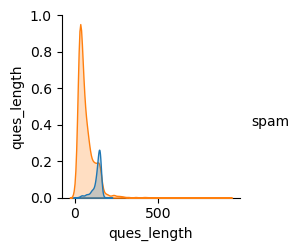

In [39]:
#Data visualisation will help to determine our feature
sns.pairplot(df,hue="spam")

In [40]:
newdf=df[df["ques_length"]>200]
newdf["predict"]=1
newdf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,message,spam,ques_length,predict
53,wow i never realized that you were so embaras...,1,281,1
126,just so that you know yetunde hasn t sent mone...,1,239,1
154,you are everywhere dirt on the floor the win...,1,370,1
333,any chance you might have had with me evaporat...,1,230,1
355,thank you for calling forgot to say happy onam...,1,201,1
...,...,...,...,...
5374,do u konw waht is rael friendship im gving yuo...,1,201,1
5451,just sing hu i think its also important to fi...,1,248,1
5515,you are a great role model you are giving so ...,1,242,1
5535,i know you are thinkin malaria but relax chi...,1,323,1


In [41]:
len(newdf["predict"]==newdf["spam"])

105

In [42]:
# we have 100% accuracy now


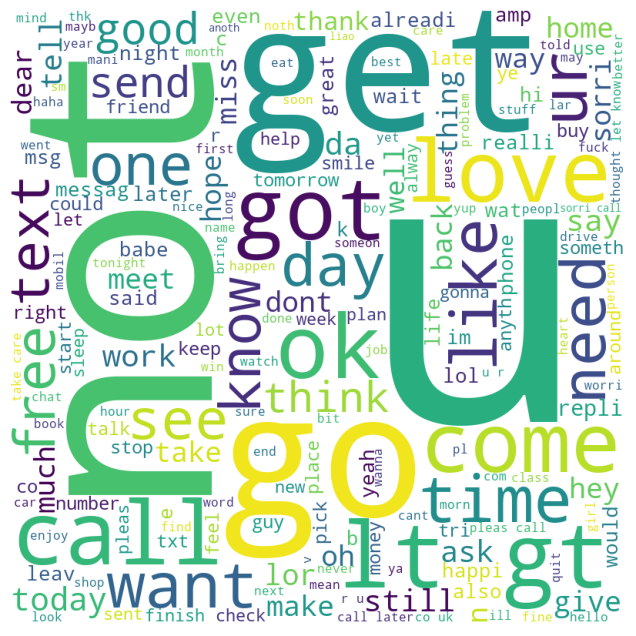

In [43]:
#Word Cloud is a data visualization technique used for representing text data 
#in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=800,background_color='white',
                      stopwords=stopwordslist,
                      min_font_size=10).generate(' '.join(corpus))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [44]:
#as 'not' has the largest size so it means it occurs most frequently
#so by watching the word cloud, we can know the frequency and can also help to drop some words 

In [46]:
#giving tf-idf score
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2000)
vectors=vectorizer.fit_transform(corpus)

In [48]:
feature_names=vectorizer.get_feature_names()
(feature_names)

['11',
 '114',
 '11mth',
 '11pm',
 '12',
 '121',
 '125',
 '12hr',
 '13',
 '1327',
 '14',
 '1417',
 '145',
 '15',
 '16',
 '18',
 '195',
 '1st',
 '1x15',
 '21',
 '22',
 '23',
 '24',
 '25',
 '25p',
 '26',
 '28',
 '284',
 '29',
 '29869',
 '2day',
 '2land',
 '2mrw',
 '2nd',
 '2nite',
 '2optout',
 '31',
 '324',
 '33',
 '35',
 '351',
 '365',
 '382',
 '39',
 '3d',
 '3g',
 '3gbp',
 '3min',
 '3qxj9',
 '3rd',
 '42',
 '434',
 '44',
 '45',
 '4742',
 '488',
 '49',
 '4get',
 '4info',
 '4t',
 '4th',
 '4u',
 '4w45wq',
 '53',
 '542',
 '58',
 '5th',
 '5wb',
 '5we',
 '611',
 '612',
 '61221',
 '617',
 '6179',
 '62',
 '62468',
 '625',
 '64',
 '65',
 '66',
 '6hr',
 '6th',
 '725',
 '73',
 '75',
 '77',
 '78',
 '786',
 '7pm',
 '7th',
 '81',
 '81151',
 '82',
 '82277',
 '83',
 '83355',
 '836',
 '8394',
 '84',
 '84199',
 '845',
 '845281',
 '85',
 '8552',
 '86',
 '86688',
 '87',
 '871',
 '87121',
 '87123',
 '87124',
 '871246',
 '87127781',
 '87131',
 '871474',
 '87152',
 '87157',
 '87175',
 '871872',
 '871872627',


In [49]:
#making dataframe
dense=vectors.todense()
denselist=dense.tolist()
df3=pd.DataFrame(denselist, columns=feature_names)

In [51]:
df3.head(2000)

,11,114,11mth,11pm,12,121,125,12hr,13,1327,...,yo,yoga,yogasana,yor,yr,yummi,yun,yuo,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
